In [0]:
!pip install xgboost

In [0]:
from google.colab import files
uploaded = files.upload()

Saving FinalData_Test_25-Mar-2020 (2).csv to FinalData_Test_25-Mar-2020 (2).csv
Saving FinalData_Train_25-Mar-2020 (2).csv to FinalData_Train_25-Mar-2020 (2).csv


In [0]:
import os
import pandas as pd
#import random
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
#from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pylab as plt

In [0]:
data_train = pd.read_csv("FinalData_Train_25-Mar-2020 (2).csv")
data_test = pd.read_csv("FinalData_Test_25-Mar-2020 (2).csv")

In [0]:
def rmse_cal(xbgModel, X, y):
    rmse = np.sqrt(metrics.mean_squared_error(xbgModel.predict(X), y))
    return rmse

In [0]:
x = data_train.drop(['Id', 'target'], axis=1)
y = data_train['target']
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, random_state = 42)

In [0]:
xgb1 = XGBRegressor(learning_rate =0.1, n_estimators=2000, objective='reg:squarederror',
                     max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb1.fit(train_x, train_y)
#calculate rmse
rmse_1_train = rmse_cal(xgb1, train_x, train_y)
rmse_1_test = rmse_cal(xgb1, test_x, test_y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
print(rmse_1_train) # learning_rate =0.1, n_estimators=2000, max_dep=5
print(rmse_1_test)

0.0008449363951199894
0.1417202972694994


In [0]:
xgb1 = XGBRegressor(learning_rate =0.1, n_estimators=1000, objective='reg:squarederror',
                     max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
param_dist = {
        'n_estimators':range(80,2000,10),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,2,20),
        #'subsample':np.linspace(0.7,0.9,20),
        #'colsample_bytree':np.linspace(0.5,0.98,10),
        #'min_child_weight':range(1,9,1)
        }
 
#RandomizedSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'neg_log_loss'，精度评价方式设定为“neg_log_loss“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
rsearch_1 = RandomizedSearchCV(
      estimator=xgb1,
      param_distributions=param_dist,
      cv=5,
      scoring='neg_mean_squared_error',
      n_iter=50,
      n_jobs = -1
      )
rsearch_1.fit(train_x, train_y)
#rsearch_1.best_score_
rsearch_1.best_params_

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


-0.015861244621208016

In [0]:
rsearch_1.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1960}

In [0]:
rmse_2_train = rmse_cal(rsearch_1, train_x, train_y)
rmse_2_test = rmse_cal(rsearch_1, test_x, test_y)

In [0]:
# learning_rate =0.01, n_estimators=1590, max_dep=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8
# cv=3, n_iter=100,
print(rmse_2_train) 
print(rmse_2_test)

0.039063948477052184
0.13750557047223325


In [0]:
# learning_rate =0.115, n_estimators=230, max_dep=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8
# cv=5, n_iter=100,
print(rmse_2_train) 
print(rmse_2_test)

0.023352966400184503
0.1364269163265322


In [0]:
# learning_rate =0.01, n_estimators=1800, max_dep=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8
# cv=5, n_iter=300,
print(rmse_2_train) 
print(rmse_2_test)

0.03430914958382773
0.1375454491340967


In [0]:
# learning_rate =0.22, n_estimators=1690, max_dep=2, min_child_weight=1, subsample=0.8, colsample_bytree=0.8
# cv=5, n_iter=10,
print(rmse_2_train) 
print(rmse_2_test)

In [0]:
# learning_rate =0.01, n_estimators=1960, max_dep=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.8
# cv=5, n_iter=10,
print(rmse_2_train) 
print(rmse_2_test)

0.04738452179839367
0.13691875862739863


In [0]:
xgb1 = XGBRegressor(learning_rate =0.1, n_estimators=200, objective='reg:squarederror',
                     max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
param_dist = {
        'n_estimators':range(80,2000,10),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }
 

rsearch_1 = RandomizedSearchCV(
      estimator=xgb1,
      param_distributions=param_dist,
      cv=5,
      scoring='neg_mean_squared_error',
      n_iter=200,
      n_jobs = -1
      )
rsearch_1.fit(train_x, train_y)
rsearch_1.best_params_

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'colsample_bytree': 0.82,
 'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 1350,
 'subsample': 0.7}

In [0]:
rmse_2_train = rmse_cal(rsearch_1, train_x, train_y)
rmse_2_test = rmse_cal(rsearch_1, test_x, test_y)

In [0]:
params_opt = rsearch_1.best_params_
print(params_opt)

{'subsample': 0.7736842105263158, 'n_estimators': 1560, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.6599999999999999}


In [0]:
# learning_rate =0.66, n_estimators=1560, max_dep=8, min_child_weight=1, subsample=0.66, colsample_bytree=0.77
# cv=5, n_iter=100,
print(rmse_2_train) 
print(rmse_2_test)

0.012427573099656383
0.13446207490898535


In [0]:
params_opt = rsearch_1.best_params_
print(params_opt)

{'subsample': 0.7, 'n_estimators': 1350, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.82}


In [0]:
# learning_rate =0.01, n_estimators=1350, max_dep=4, min_child_weight=2, subsample=0.7, colsample_bytree=0.82
# cv=5, n_iter=100,
print(rmse_2_train) 
print(rmse_2_test)

0.06353731621965174
0.13065348425543863


In [0]:
xgb2 = XGBRegressor(
    learning_rate =0.01, 
    n_estimators=1350,
    objective='reg:squarederror',
    metrics='rmse',
    max_depth=4, min_child_weight=2, subsample=0.7, colsample_bytree=0.82)
xgb2.fit(train_x, train_y)
rmse_final_train = rmse_cal(xgb2, train_x, train_y)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
rmse_fianl_test = rmse_cal(xgb2, test_x, test_y)

In [0]:

print(rmse_final_train)
print(rmse_fianl_test)

0.06353731621965174
0.13065348425543863


In [0]:
data_test

,Id,SaleType,Functional,Neighborhood,Has_Bsmnt,CentralAir_Y,MoSold,TotalPorch,SqX2ndFlrSF,Condition1_2,GarageFinish_RFn,YearRemodAdd,MSSubClass_Nbr,LandContour,X3SsnPorch,Exterior1st,BsmtUnfSF,MasVnrType,Seasonality,BsmtFinSF2,LotConfig,OverallQual,Condition1,Has_Fireplace,MSZone_Nbr,GarageCars,TotalArea,LogLotArea,Exterior1_2,PavedDrive,ScreenPorch,PoolQC,GarageCond_Qual,FireplaceQu,Street_Pave,MasVnrArea,BsmtExposure,Has_Pool,BsmtFinSF1,RoofMatl,LogOpenPorchSF,TotRmsAbvGrd,YearBuilt,SaleCondition
0,1461,11.991061,12.038511,11.868045,1,1,12.019938,260,0,1,0,59,12.081593,12.022694,0,12.205873,270.0,11.892919,1,144.0,12.001900,11.780657,11.818334,0,11.810264,1,1778.0,9.360655,0,12.059895,120,12.022115,12.115144,11.808907,1,0.0,11.955876,0,468.0,12.019216,0.000000,5,59,12.005034
1,1462,11.991061,12.038511,11.868045,1,1,12.019938,429,0,0,0,62,12.081593,12.022694,0,11.838506,406.0,12.166481,1,0.0,12.027446,11.967308,12.042916,0,12.148037,1,2658.0,9.565704,0,12.059895,0,12.022115,12.115144,11.808907,1,108.0,11.955876,0,923.0,12.019216,3.583519,6,62,12.005034
2,1463,11.991061,12.038511,12.155803,1,1,12.030134,246,491401,0,0,22,12.664199,12.022694,0,12.205873,137.0,11.892919,1,0.0,12.001900,11.780657,12.042916,1,12.148037,2,2557.0,9.534595,0,12.059895,0,12.022115,12.115144,12.186416,1,0.0,11.955876,0,791.0,12.019216,3.526361,6,23,12.005034
3,1464,11.991061,12.038511,12.155803,1,1,12.019938,396,459684,0,0,22,12.664199,12.022694,0,12.205873,324.0,12.166481,1,0.0,12.001900,11.967308,12.042916,1,12.148037,2,2530.0,9.208138,0,12.059895,0,12.022115,12.115144,12.256533,1,20.0,11.955876,0,602.0,12.019216,3.583519,7,22,12.005034
4,1465,11.991061,12.038511,12.585486,1,1,11.963300,226,0,0,1,28,12.320867,12.259257,0,11.951899,1017.0,11.892919,0,0.0,12.001900,12.497191,12.042916,0,12.148037,2,2560.0,8.518193,0,12.059895,144,12.022115,12.115144,11.808907,1,0.0,11.955876,0,263.0,12.019216,4.406719,5,28,12.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,11.991061,12.038511,11.474522,1,1,12.019938,0,298116,0,0,50,11.594241,12.022694,0,12.204922,546.0,11.892919,1,0.0,12.001900,11.557148,12.042916,0,11.370855,0,1638.0,7.568379,1,12.059895,0,12.022115,10.983251,11.808907,1,0.0,11.955876,0,0.0,12.019216,0.000000,5,50,12.005034
1455,2916,11.991061,12.038511,11.474522,1,1,11.972056,24,298116,0,0,50,11.594241,12.022694,0,12.204922,294.0,11.892919,1,0.0,12.001900,11.557148,12.042916,0,11.370855,1,1638.0,7.546446,1,12.059895,0,12.022115,12.115144,11.808907,1,0.0,11.955876,0,252.0,12.019216,3.178054,6,50,11.788774
1456,2917,11.991061,12.038511,11.933948,1,1,12.098561,474,0,0,0,24,12.081593,12.022694,0,12.205873,0.0,11.892919,0,0.0,12.001900,11.780657,12.042916,1,12.148037,2,2448.0,9.903488,0,12.059895,0,12.022115,12.115144,12.186416,1,0.0,11.955876,0,1224.0,12.019216,0.000000,7,60,11.788774
1457,2918,11.991061,12.038511,11.933948,1,1,12.042791,112,0,0,0,28,11.924297,12.022694,0,11.951899,575.0,11.892919,1,0.0,12.001900,11.780657,12.042916,0,12.148037,0,1882.0,9.253496,1,12.059895,0,12.022115,10.983251,11.808907,1,0.0,12.158267,0,337.0,12.019216,3.465736,6,28,12.005034


In [0]:
TestX = data_test.drop(['Id'], axis=1)
xgb_subm = XGBRegressor(
      learning_rate =0.01, 
      n_estimators=1350,
      objective='reg:squarederror',
      metrics='rmse',
      max_depth=4, 
      min_child_weight=2, 
      subsample=0.7, 
      colsample_bytree=0.82)
xgb_subm.fit(x, y)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.82, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, metrics='rmse', min_child_weight=2, missing=None,
             n_estimators=1350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7, verbosity=1)

In [0]:
Prediction = xgb_subm.predict(TestX)
submission = pd.DataFrame(data_test['Id'])
submission['SalePrice'] = np.exp(Prediction)
submission = submission.set_index('Id')


In [0]:
print(submission)

          SalePrice
Id                 
1461  125009.500000
1462  158789.718750
1463  194264.562500
1464  192089.765625
1465  194158.062500
...             ...
2915   81293.890625
2916   91006.476562
2917  153113.718750
2918  118574.320312
2919  213299.687500

[1459 rows x 1 columns]


In [0]:
submission.to_csv('MySubmission.csv')

In [0]:
#with open('example.txt', 'w') as f:
#  f.write('some content')

files.download('MySubmission.csv')

Text(0, 0.5, 'Feature Importance Score')

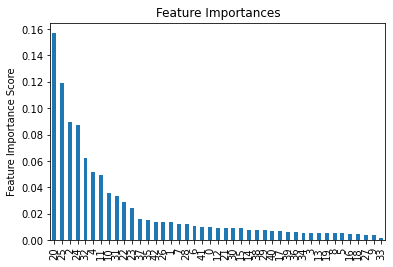

In [0]:
feat_imp = pd.Series(xgb_subm.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')